# Gathering and displaying drawing data

In [1]:
import pandas as pandapaco
import requests
import re
from bs4 import BeautifulSoup

## Intro
This app collects data from all 1,900+ (and counting) drawings from an experienced furry artist and illustrator, Paco (aka pandapaco, or Paco Panda). The data will collect things such as:

- Name and date of the artwork
- Species and character names
- Number of character in each artwork
- Type (previously Medium) (either drawn digitally or traditional with exceptions of programs and tools used)
- Medium (for tools/programs used in an artwork)
- Source (either from FurAffinity or DeviantArt)

I was also planning to get the most colors used, as in only in each characters, excluding backgrounds, items, etc. However, because I have deal with shading and color correction, it will be a tedious and cumbersome dataset to obtain; yes we can refer it to their fursona's ref sheet and get the colors that way but there are some cases that it won't be available, so for now - I won't add this dataset.

The "expressions" dataset was removed on March 13, 2022 because it was too ambigious and difficult to determine to pinpoint an expression.

### `species` and `characters` datasets

Since there are 2 or more characters, and some duplicates - it'll be returned as an array for each `species` and `characters`. I assume that there are by average 3 to 6 characters he draws on each artwork.

For generalizing the `species` data to the website, it's going to be explicitly categorized into, well... foxes, canines, cats, yeens, etc. Hybrids are categorized in their own category, while species like protogens, and other exotic and/or fictional species will be categorized as "Others".

## How this process works

### Gathering the data
Previously, I manually copy-pasted data from the sheets and would turn them into a JSON from the web app to be parsed. It took me a while to use a scraping method with BeautifulSoup library.

So, I made `bs4` target Paco's gallery page on FurAffinity and get the title, description, date, and tags, then save them in a JSON file like so -- for demonstration purposes, we only get the title and date of each artwork, each gallery page has 48 items.

The full code is available on `/data/scraper/fa-scrapr.py`. DeviantArt support coming soon.

In [7]:
find_art = requests.get(f"https://furaffinity.net/gallery/pacopanda/1/?")
parse_art = BeautifulSoup(find_art.text, 'html.parser')
parse_art = parse_art.find_all('figure', {'id': re.compile("sid-*")})

print(f"Title | Date | Link to the image")

for sid in parse_art:
  if 'id' in sid.attrs:
    sid_concat = re.sub('sid-', '', sid['id'])
    find_art_id = requests.get(f"https://furaffinity.net/view/{sid_concat}/")
    parse_art_id = BeautifulSoup(find_art_id.text, 'html.parser')

    # Get title
    find_title = parse_art_id.find('div', {'class': 'submission-title'})
    art_title = find_title.find('p').get_text()

    # Get image
    detect_img = parse_art_id.find('div', {'class': 'aligncenter submission-area'})

    if detect_img.find('img'):
      art_image = parse_art_id.find('img', {'id': 'submissionImg'})['src']
      art_image = f'https:{art_image}'

    # If no image is detected (i.e. video or flash content); then return null
    else:
      art_image = 'null, item requested is anything other than an image.'

    # Get date
    art_date = parse_art_id.find('span', {'class': 'popup_date'})['title']
    
    # Print results
    print(f"{art_title} | {art_date} | {art_image}")


Title | Date | Link to the image
Art and Biro Comic: Full Cover | Apr 5, 2022 02:29 PM | https://d.furaffinity.net/art/pacopanda/1649183537/1649183387.pacopanda_artbirocomic.png
Gotta Catch 'em All | Apr 1, 2022 02:51 PM | https://d.furaffinity.net/art/pacopanda/1648839101/1648839101.pacopanda_01siku_patch.png
Sleepover Cuddles | Mar 30, 2022 02:23 PM | https://d.furaffinity.net/art/pacopanda/1648664608/1648664608.pacopanda_30sleepover_pov.jpg
Biscuit and Paco Sharing Adventures at the Campfire | Mar 25, 2022 02:46 PM | https://d.furaffinity.net/art/pacopanda/1648234008/1648234008.pacopanda_biscuit_paco_campfire_photo.jpg
Nodd Mouse | Mar 22, 2022 03:37 PM | https://d.furaffinity.net/art/pacopanda/1647977836/1647977836.pacopanda_nodd_icon.png
Belly Rubs | Mar 21, 2022 03:03 PM | https://d.furaffinity.net/art/pacopanda/1647889392/1647889392.pacopanda_bellyrubs2.png
Dito | Mar 17, 2022 02:36 PM | https://d.furaffinity.net/art/pacopanda/1647542168/1647542168.pacopanda_dito_icon.png
Horror

### Example
[This Google Sheet](https://docs.google.com/spreadsheets/d/1fpNL-qbfZ53H-6WdqEB2X9rwn9QmM1porJqKgBC7rPk/edit?usp=sharing) contains all raw data and get a slice of data as an example to truncate, summarize, visualize some data through the web browser.

As an example, we'll take one of his artworks [*"First Meet"*](https://www.deviantart.com/pandapaco/art/First-Meet-901151258) and analyze it, the image is cropped for clarity.
<p>
  <a href="https://www.deviantart.com/pandapaco/art/First-Meet-901151258">
    <img src="img/first_meet_by_pandapaco.jpg" width="600">
  </a>
</p>

Two characters are visible: which are Kazan and Steffen respectively, their species are wolf and an otter; the artwork is traditionally drawn taken from a camera. So overall, the result should be something like this in the dataset:

In [3]:
shy_boi = ['12/19/21', 'First Meet', 'Kazan, Steffen', 'Wolf, Otter', 'Traditional'],

pandapaco.DataFrame(shy_boi, columns = ["Date", "Title", "Character(s)", "Species", "Type"])

,Date,Title,Character(s),Species,Type
0,12/19/21,First Meet,"Kazan, Steffen","Wolf, Otter",Traditional


Cool! And in other example, we'll use a huge dataset and will get data from his artwork from January 2021 alone. The column `source` is included in the sheets and shown the first 5 omitted for brevity; it should be something like this:

In [4]:
paco_jan_dataset = pandapaco.read_csv('./csv/paco-jan2021.csv')
paco_jan_dataset.head(5)

,Date,Title,Character(s),Species,Medium
0,1/5/21,Calm always come,"Zak, Cirrus","Fox, Fox",Digital
1,1/7/21,Alf Doggo,Alf,Dog,Digital
2,1/8/21,A Hidden Shrine,"Shibby, Emerald","Fox, Fox",Traditional
3,1/14/21,Puck the Sabertooth,Puck,Sabertooth,Digital
4,1/15/21,Doctor Nodd,Nodd,Mouse,Traditional


Initally, I wrote a Python script below to convert an exported CSV files off of Google Sheets into JSON files... The only time I realized that this was the most dumbest thing I've made since D3 and Chart.js can read off of CSV files... lol

## Plotting data
Basing all the data from 2021 alone, first, we plot a pie chart for sums of artworks drawn in both digital and traditional.

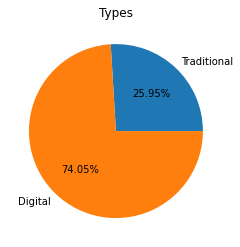

In [5]:
%run -i paco-ds-types.py

Then, we'll get a number of species drawn from the dataset: from a horrible Python script I wrote, it decouples the `Species` column and merge into one big CSV file -- making a CSV file with a single column. Then, it'll read the decoupled CSV file to get a total sum for each species drawn, and finally filter the values in ascending order.

The data below shows the first 10 of the species for simplicity, there is 63+ of total in the final dataset.

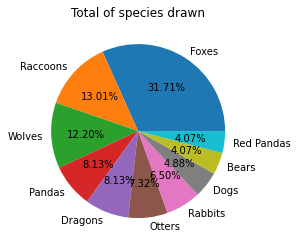

,Species,Count
60,Fox,39
61,Raccoon,16
62,Wolves,15
57,Panda,10
24,Dragons,10
38,Otter,9
59,Rabbit,8
16,Dog,6
5,Bear,5
58,Red Panda,5


In [6]:
# This script decouples species and expressions into a big, single column CSV files
# %run -i paco-ds-merge-data.py

# ...and this script reads the decoupled CSV files and plots the data for it
%run -i paco-ds-species-2021.py